MSE (probabilities vs true churn): 0.14003959796910284
MAE (probabilities vs true churn): 0.2770468821534022
Churn rate in top 10% highest-risk group: 0.7142857142857143
Overall churn rate: 0.2658137882018479


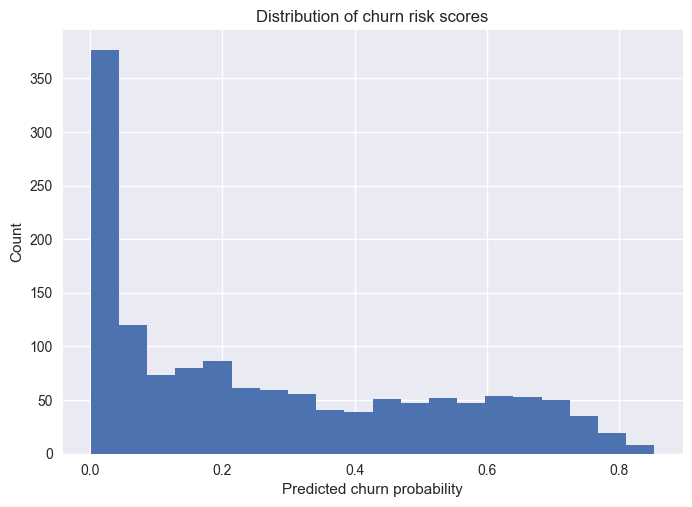

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

plt.style.use("seaborn-v0_8")

# 1. Load probabilities saved from previous notebook OR recompute
proba_df = pd.read_csv("../data/processed/telco_logreg_test_proba.csv")
proba_df.head()

y_test = proba_df["Churn_true"]
y_proba = proba_df["Churn_proba"]

# 2. Regression-style metrics
mse = mean_squared_error(y_test, y_proba)
mae = mean_absolute_error(y_test, y_proba)
print("MSE (probabilities vs true churn):", mse)
print("MAE (probabilities vs true churn):", mae)

# 3. Distribution of churn risk scores
plt.hist(y_proba, bins=20)
plt.xlabel("Predicted churn probability")
plt.ylabel("Count")
plt.title("Distribution of churn risk scores")
plt.savefig("../figures/churn_prob_distribution.png", bbox_inches="tight")

# 4. Rank customers by risk
results = proba_df.copy()
results['risk_rank'] = results['Churn_proba'].rank(ascending=False)

# Top 10% highest risk
top_n = int(len(results) * 0.10)
top_risk = results.nsmallest(top_n, 'risk_rank')  # smallest rank = highest risk
print("Churn rate in top 10% highest-risk group:", top_risk['Churn_true'].mean())
print("Overall churn rate:", y_test.mean())
